In [1]:
#Импорт библиотек
from IPython.display import Image
from numpy import pi
from qutip import *
from pylab import *
import pandas as pd
%matplotlib inline

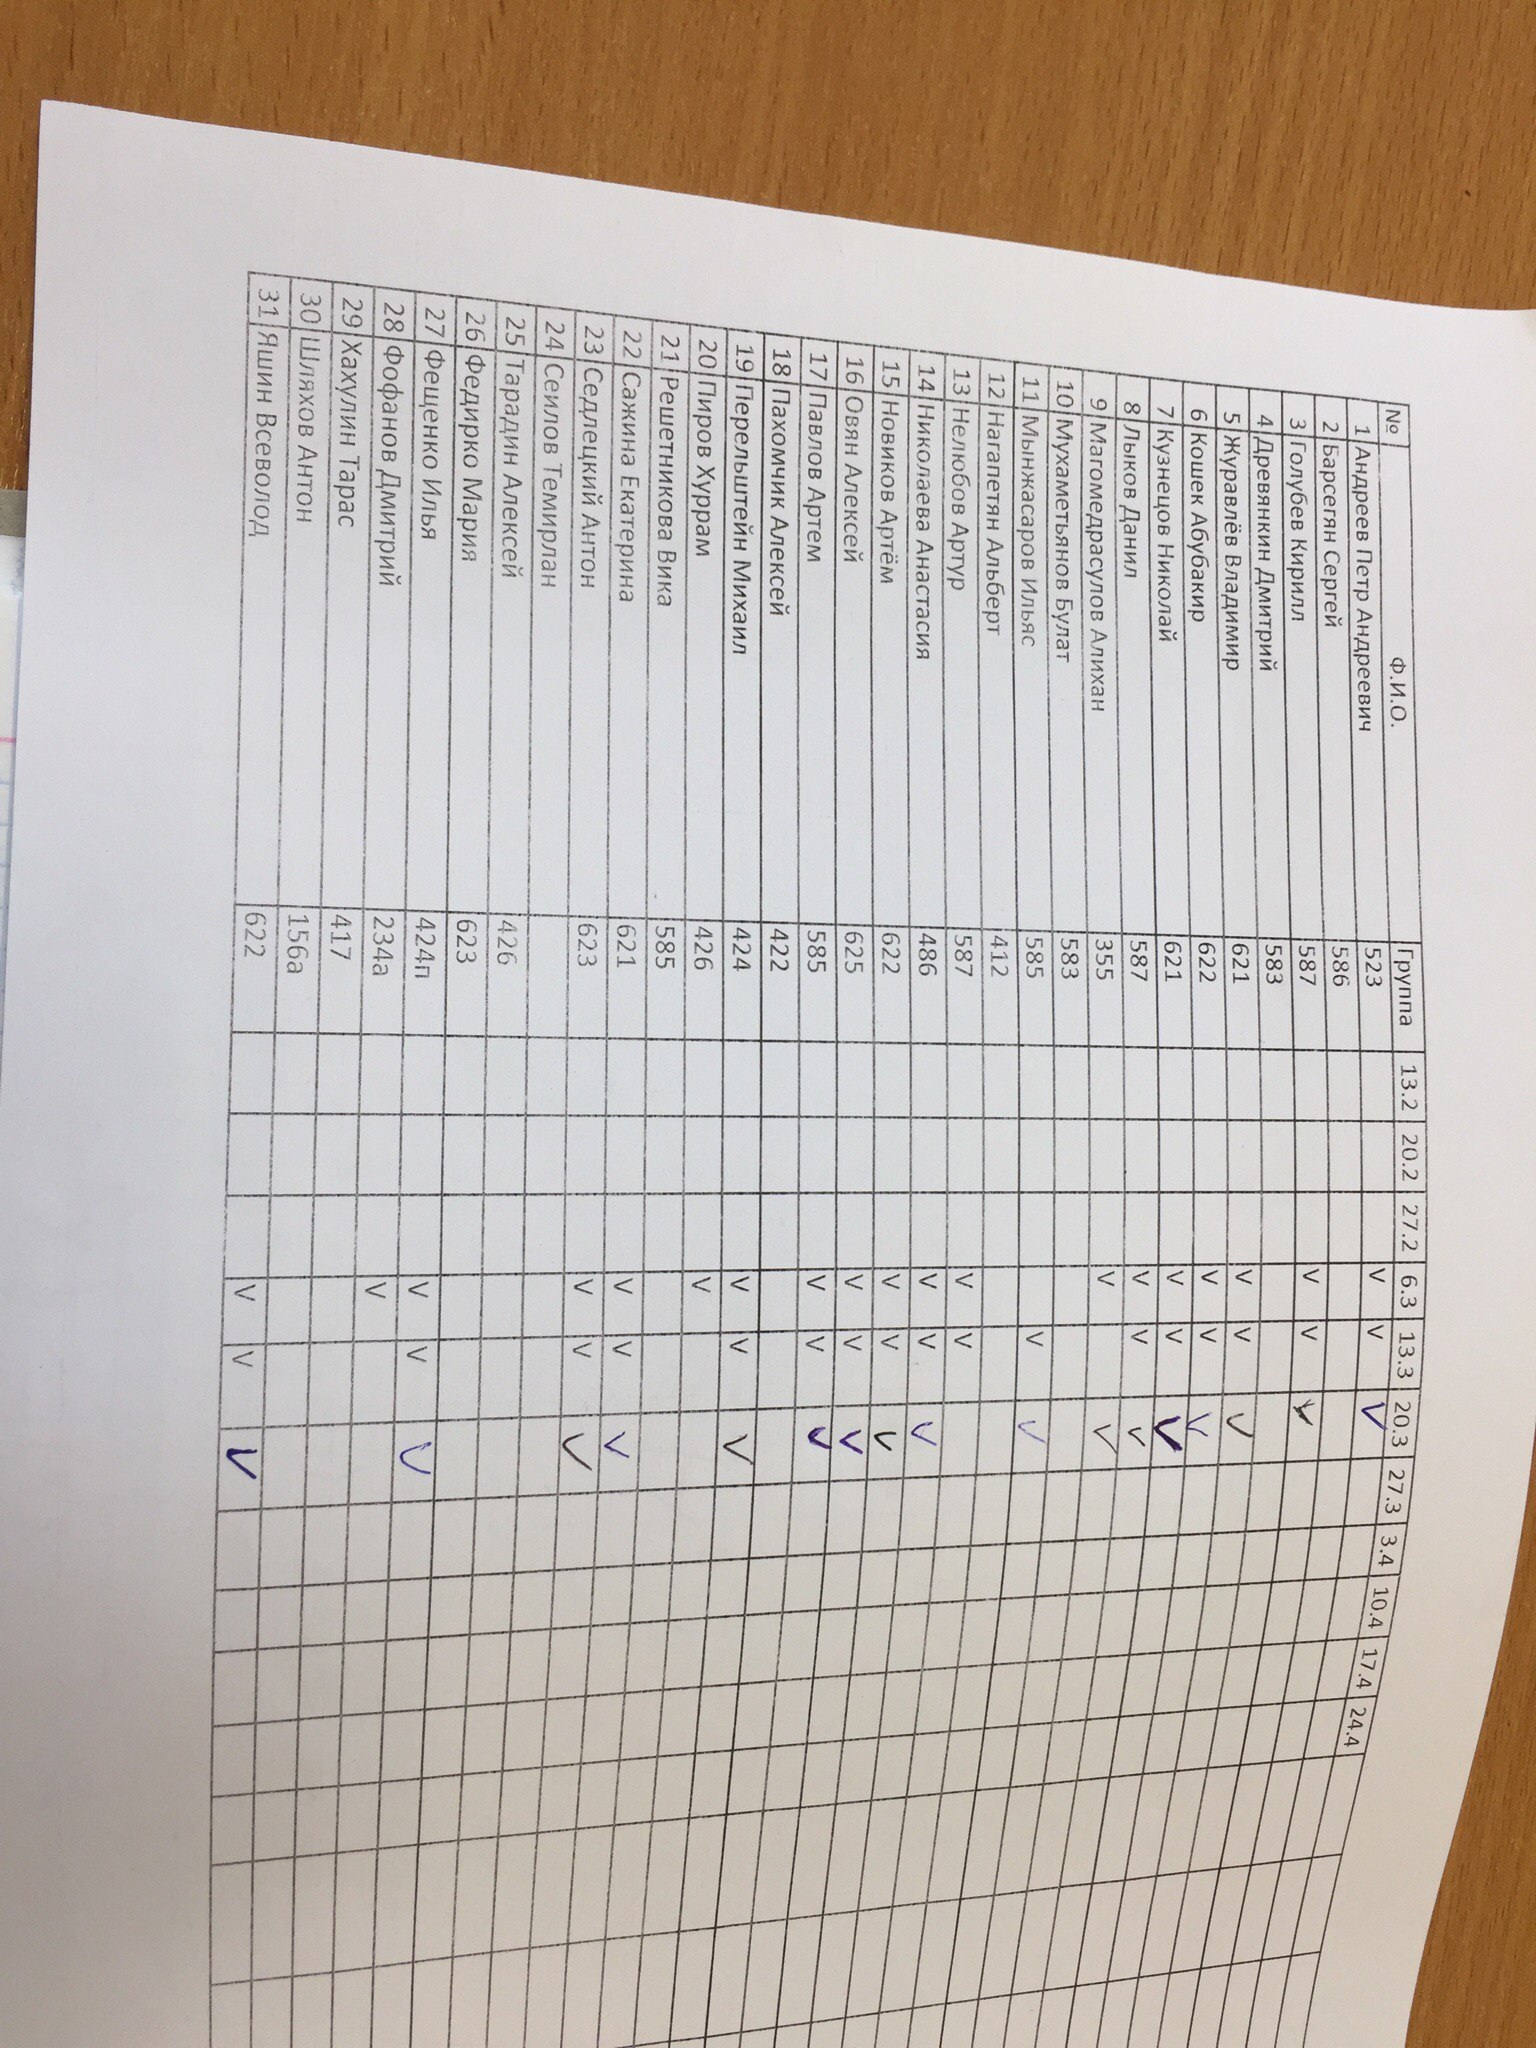

In [2]:
#Тут сложная система:
#Вы берёте свой порядковый номер в списке: N.
Image(filename='Numbers.jpg')

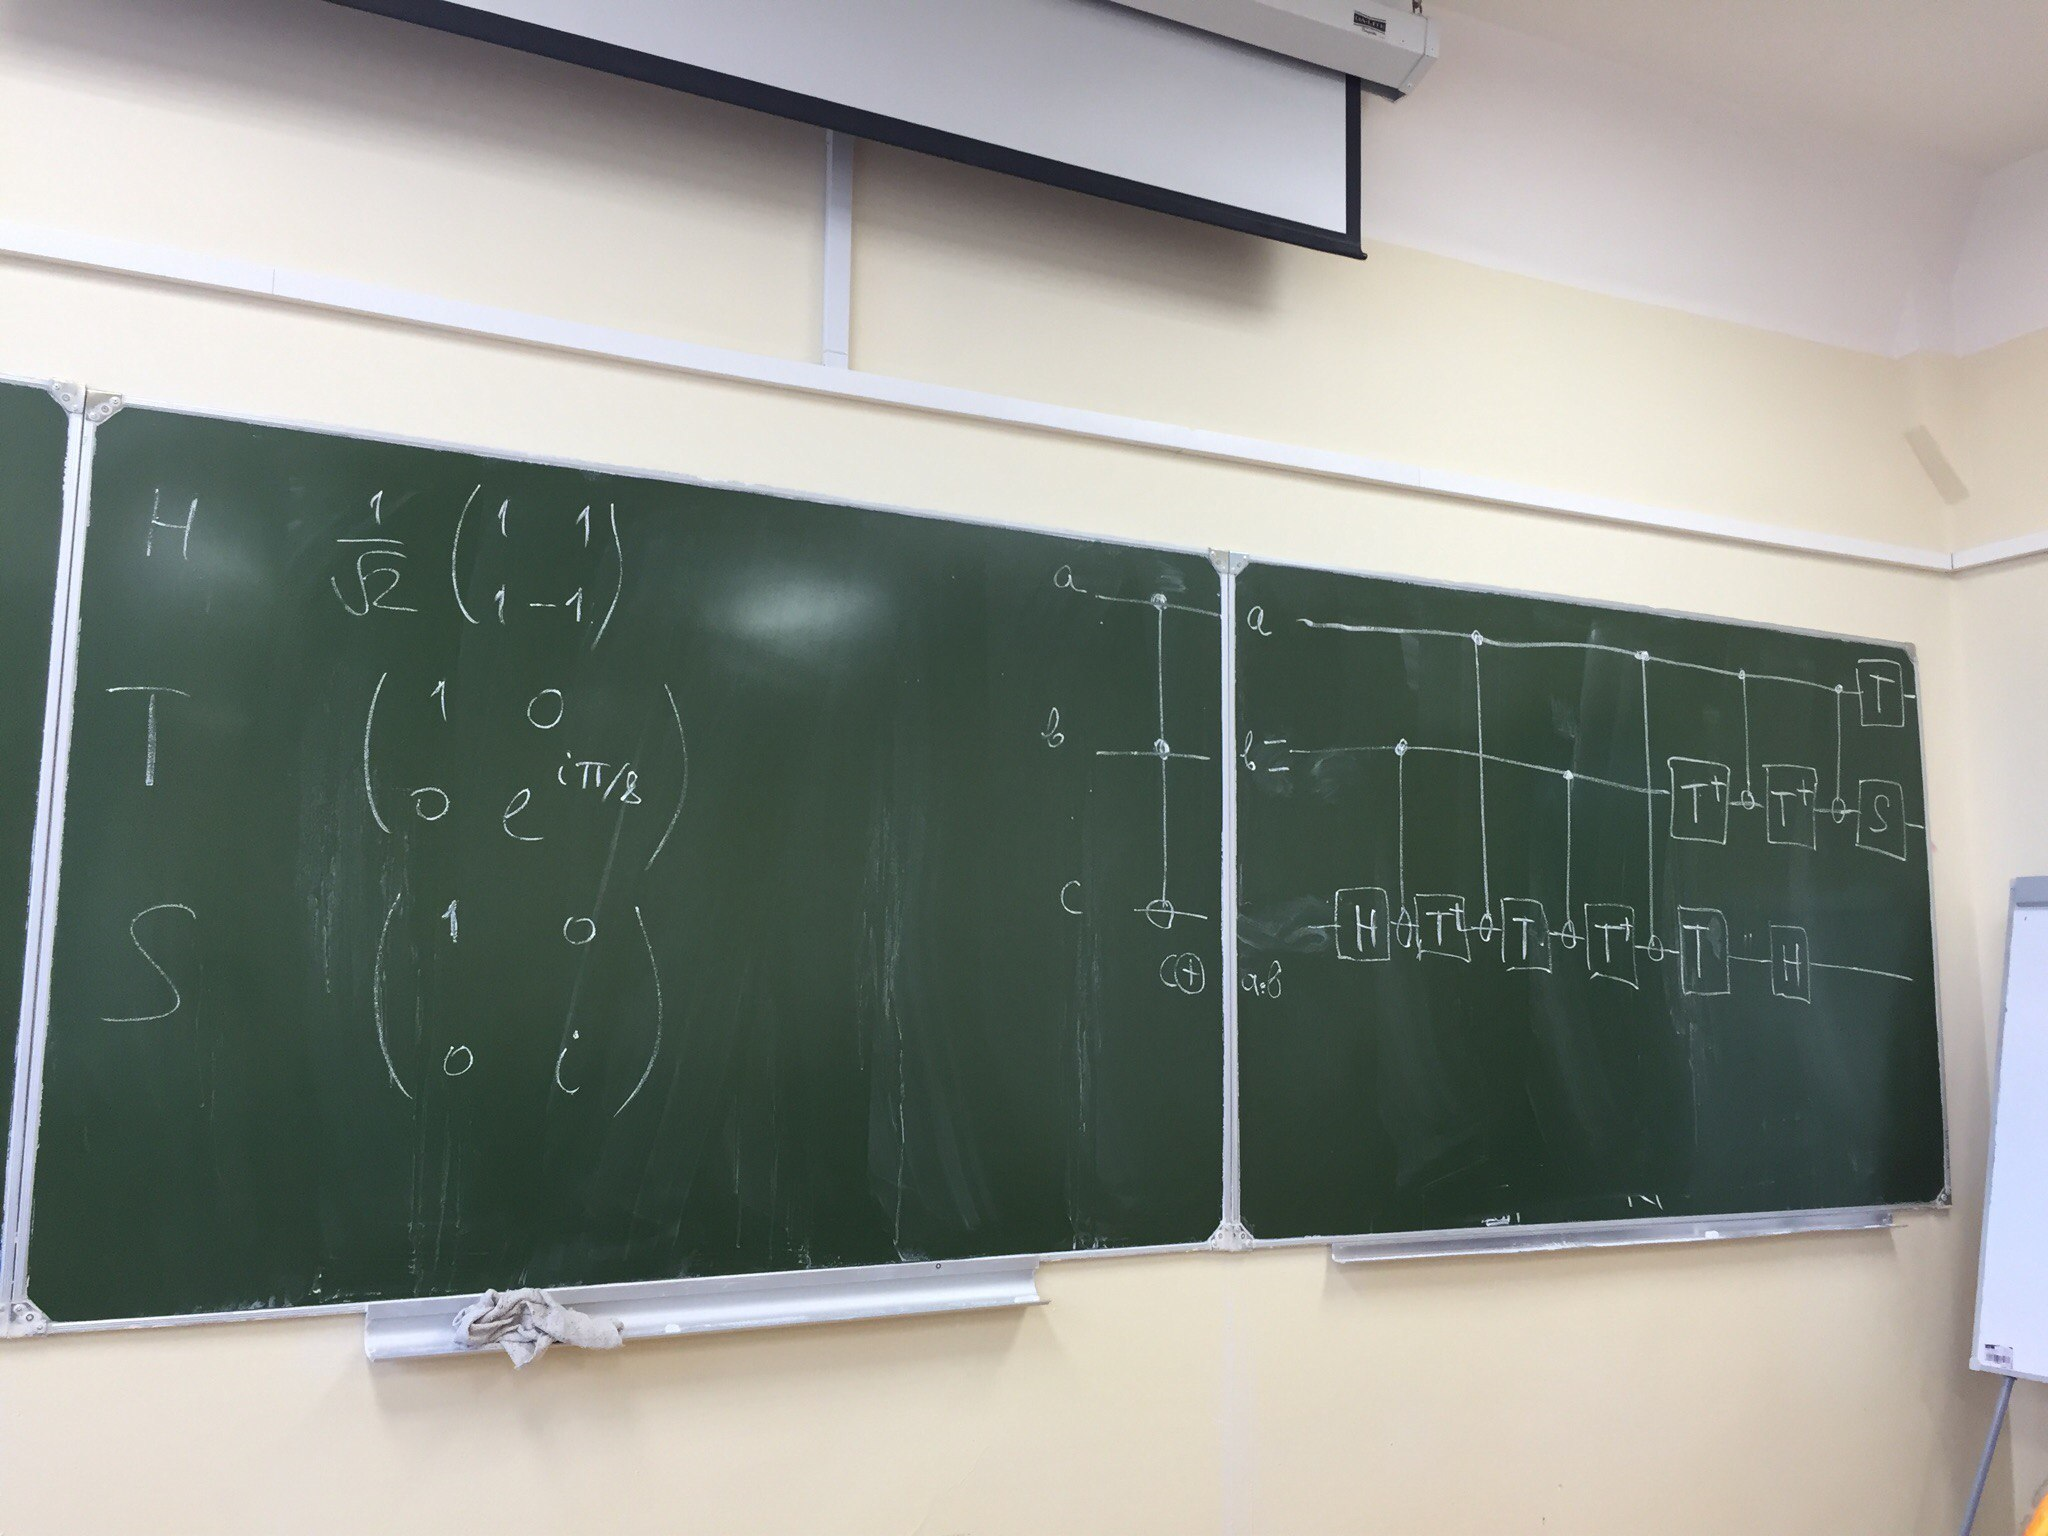

In [3]:
#Потом берёте N mod 8. 
#Переводите у двоичную систему. 
#Получаете двоичное число из трёх символов. 
#Это ваши числа abc. 
#Подаёте в эту схему. (Вместо 8 в матрице T должна стоять 4)
Image(filename='Algorithm.jpg')
#И на каждом шаге записываете волновую функцию.

In [4]:
my_number = 27 #Входные данные - 27
my_number = my_number % 8
my_number

3

In [5]:
qc3 = QubitCircuit(3) #Инициализация цепи с количеством кубитов, равным 3
a = [array([[ 0.+0.j, 0.+0.j, 0.+0.j,  1.+0.j, 0.+0.j, 0.+0.j,  0.+0.j,  0.+0.j]])] #Начальная волновая функция
#В этот массив мы будем складывать значения волновых функций. 

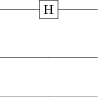

In [6]:
qc3.add_gate("SNOT", [2]) #Добавляем первую операцию -вентиль Адамара на последний кубит
qc3.png #Взглянем на цепь

In [7]:
gate_sequence_product(qc3.propagators())[my_number] #Так выглядит пси-функция при наших данных после работы алгоритма

array([[ 0.00000000+0.j,  0.00000000+0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j]])

In [8]:
pd.DataFrame(array(gate_sequence_product(qc3.propagators())[my_number]), columns=['|000>', '|001>', '|010>', '|011>', '|100>', '|101>', '|110>', '|111>'])
#То же в виде таблицы

,|000>,|001>,|010>,|011>,|100>,|101>,|110>,|111>
0,0j,0j,(0.707106781187+0j),(-0.707106781187+0j),0j,0j,0j,0j


In [9]:
a.append(gate_sequence_product(qc3.propagators())[my_number]) #Действуем на входные данные цепью 
#и добавляем полученное значение волновой функции в массив

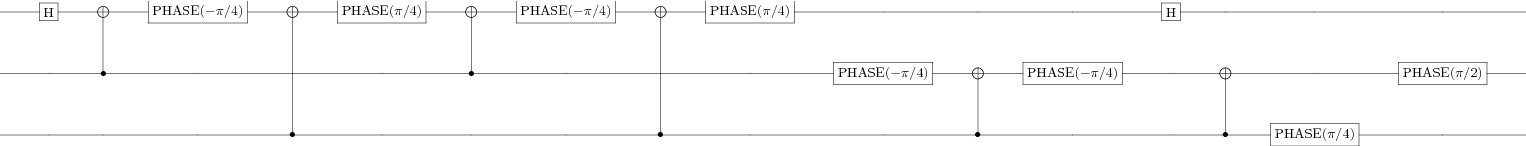

In [10]:
qc3.add_gate("CNOT", 2, 1) #Добавляем больше операций
a.append(gate_sequence_product(qc3.propagators())[my_number]) #Добавим в массив больше пси-функций
phi = pi/4 #Угол поворота фазы в матрице T
qc3.add_gate("PHASEGATE", targets=2, arg_value=-phi, arg_label=r"-\pi/4")
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("CNOT", 2, 0)
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("PHASEGATE", targets=2, arg_value=phi, arg_label=r"\pi/4")
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("CNOT", 2, 1)
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("PHASEGATE", targets=2, arg_value=-phi, arg_label=r"-\pi/4")
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("CNOT", 2, 0)
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("PHASEGATE", targets=2, arg_value=phi, arg_label=r"\pi/4")
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("PHASEGATE", targets=1, arg_value=-phi, arg_label=r"-\pi/4")
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("CNOT", 1, 0)
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("PHASEGATE", targets=1, arg_value=-phi, arg_label=r"-\pi/4")
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("SNOT", [2])
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("CNOT", 1, 0)
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("PHASEGATE", targets=0, arg_value=phi, arg_label=r"\pi/4")
a.append(gate_sequence_product(qc3.propagators())[my_number])
qc3.add_gate("PHASEGATE", targets=1, arg_value=pi/2, arg_label=r"\pi/2")
a.append(gate_sequence_product(qc3.propagators())[my_number])

qc3.png #Взглянем на цепь

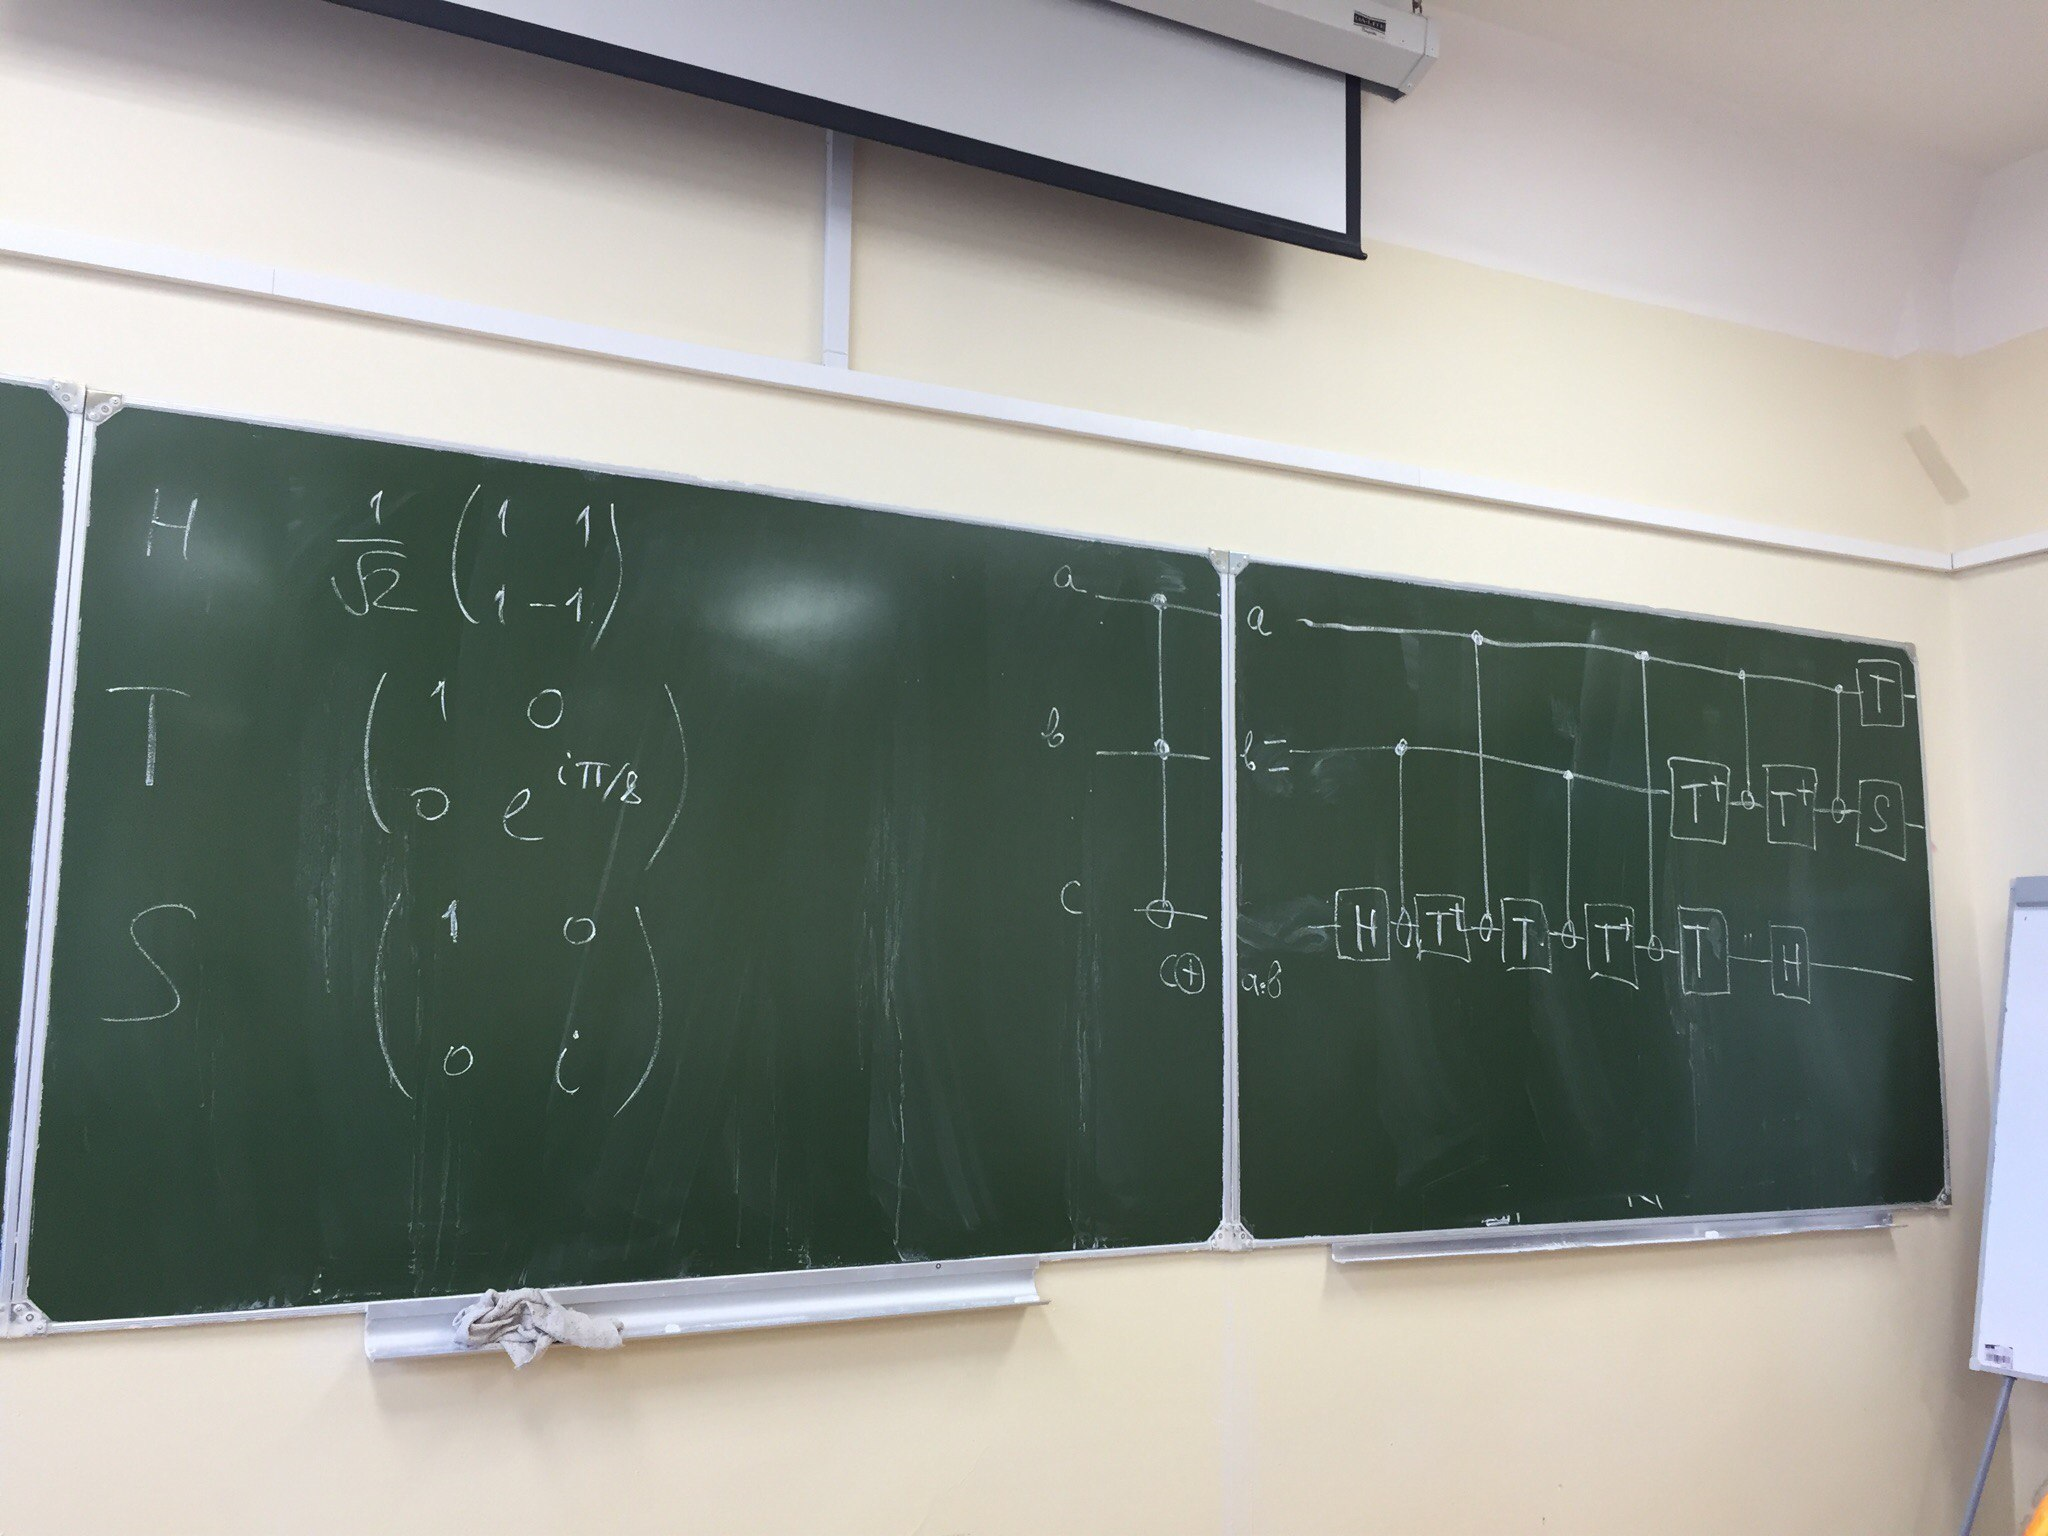

In [11]:
Image(filename='Algorithm.jpg') #Сравниваем с тем, что нам было нужно. Изображение перевёрнуто, а так всё верно

In [12]:
gate_sequence_product(qc3.propagators())

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]]

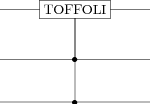

In [13]:
#Опытные люди уже здесь могут узнать вентиль Тоффоли. Проверим эквивалентность схем

qctoffoli = QubitCircuit(3)
qctoffoli.add_gate("TOFFOLI", 2, [0, 1]) #Добавляем первую операцию -вентиль Тоффоли
qctoffoli.png #Взглянем на цепь

In [14]:
gate_sequence_product(qc3.propagators()) == gate_sequence_product(qctoffoli.propagators())

True

In [15]:
#Представим результат (ряд пси-функций с нашими входными данными) в виде таблицы
a = pd.DataFrame(array(a)[:, 0, :], columns=['|000>', '|001>', '|010>', '|011>', '|100>', '|101>', '|110>', '|111>'])
a

,|000>,|001>,|010>,|011>,|100>,|101>,|110>,|111>
0,0j,0j,0j,(1+0j),0j,0j,0j,0j
1,0j,0j,(0.707106781187+0j),(-0.707106781187+0j),0j,0j,0j,0j
2,0j,0j,(0.707106781187+0j),(0.707106781187+0j),0j,0j,0j,0j
3,0j,0j,(0.5-0.5j),(0.5-0.5j),0j,0j,0j,0j
4,0j,0j,(0.5-0.5j),(0.5-0.5j),0j,0j,0j,0j
5,0j,0j,(0.707106781187+0j),(0.707106781187+0j),0j,0j,0j,0j
6,0j,0j,(0.707106781187+0j),(-0.707106781187+0j),0j,0j,0j,0j
7,0j,0j,(0.5-0.5j),(-0.5+0.5j),0j,0j,0j,0j
8,0j,0j,(0.5-0.5j),(-0.5+0.5j),0j,0j,0j,0j
9,0j,0j,(0.707106781187+0j),(-0.707106781187+0j),0j,0j,0j,0j
